<a href="https://colab.research.google.com/github/dhahbimohamed/ml-zero-to-expert/blob/main/09_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **✅understanding: 7.5 / 10**

# **🔹 What is an SVM?**
Support Vector Machines (SVMs) are powerful classification algorithms that try to separate different classes in the best possible way.
They do this by finding the optimal decision boundary — a line (or a curve, depending on the kernel) that creates the largest margin between the two classes.

# **🔸 What are Support Vectors?**
Support vectors are the data points closest to the decision boundary.
They are the hardest examples to classify, and they determine where the boundary is placed.
The model gives these points special importance, as even a small move can change the boundary completely.

In [2]:
from sklearn import datasets
import pandas as pd


iris = datasets.load_iris()
X = pd.DataFrame(iris.data  , columns = iris.feature_names)
y = iris.target

# Use only 2 classes to simplify the visualization
X = X[y!= 2]
y = y[y!= 2]

# **⚙️ Why do we scale features before using SVM?**
SVM works based on distance calculations, so features with large numbers (like 100 or 300) can
dominate those with small values (like 1 or 2).
To avoid this, we apply feature scaling — typically using StandardScaler — so all features have similar ranges and contribute equally.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[12  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



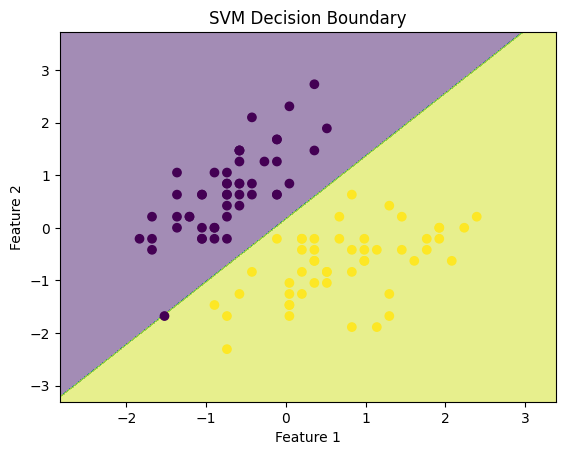

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Use only two features for visualization
X_vis = X[:, :2]

model_vis = SVC(kernel='linear')
model_vis.fit(X_vis, y)

# Plotting
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model_vis, X_vis, y)